### Laptop Price Prediction → EDA 

**Step 0: Load Dataset**

In [20]:
import pandas as pd
df = pd.read_csv("C:\\dataset\\Laptop-Price-Prediction\\data\\raw\\Laptop_price.csv")
df.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


**Step 1: Dataset Overview**

In [21]:
df.shape

(1000, 7)

Here Rows 1000 and Columns 7

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


Categorical columns 1(Brand)

Numeroical columns 6(Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price)

Target feature is Price

In [23]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Laptop prices vary widely → strong feature impact

RAM and Storage have large ranges → most important for price

Processor speed increases with higher price

Screen size has low variation → less impact

Weight has minor influence

Few high-end laptops increase average price

**Step 2: Missing Values**

In [24]:
df.isnull().sum()


Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64

have no missing value 

**Step 3: Numeric Features Analysis**

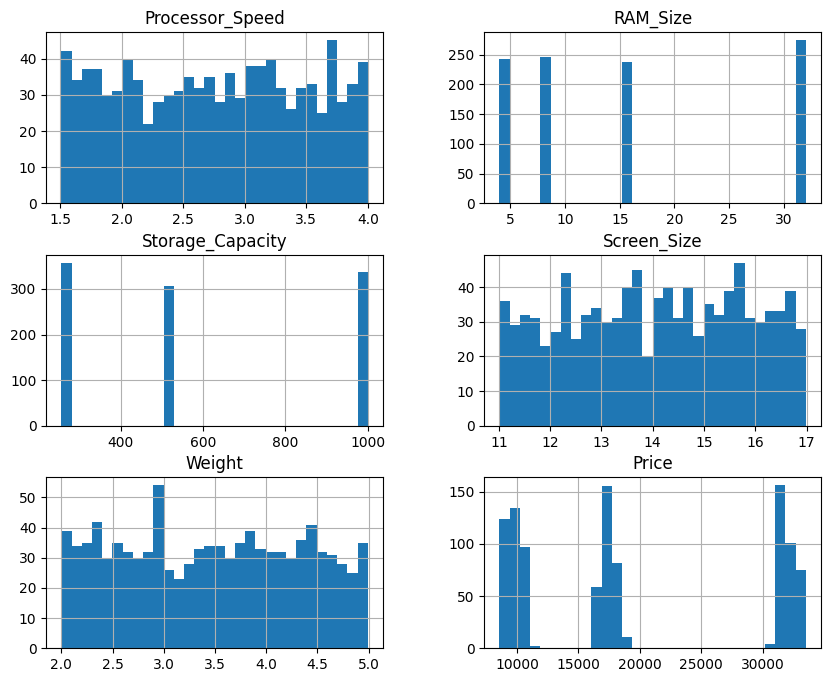

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64','float64'])

# Histograms
numeric_df.hist(bins=30, figsize=(10,8))
plt.show()


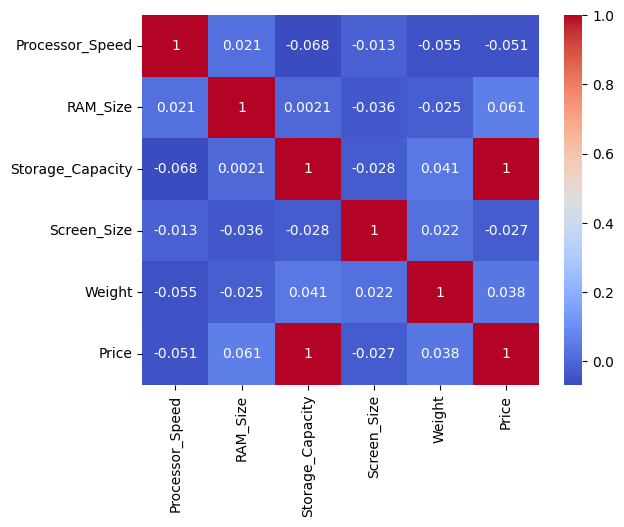

In [26]:
# Correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Step 4: Categorical Features Analysis**

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


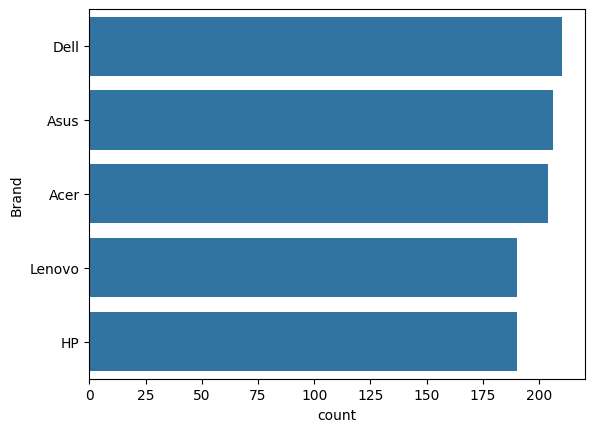

In [27]:
categorical_cols = ['Brand']

for col in categorical_cols:
    print(df[col].value_counts())
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.show()


**Step 5: Price vs Categorical Features**

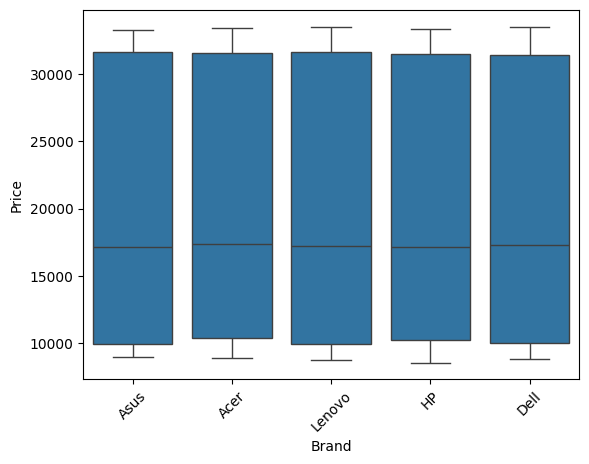

In [28]:
for col in categorical_cols:
    sns.boxplot(x=col, y='Price', data=df)
    plt.xticks(rotation=45)
    plt.show()


**Step 6: Price vs Numeric Features**

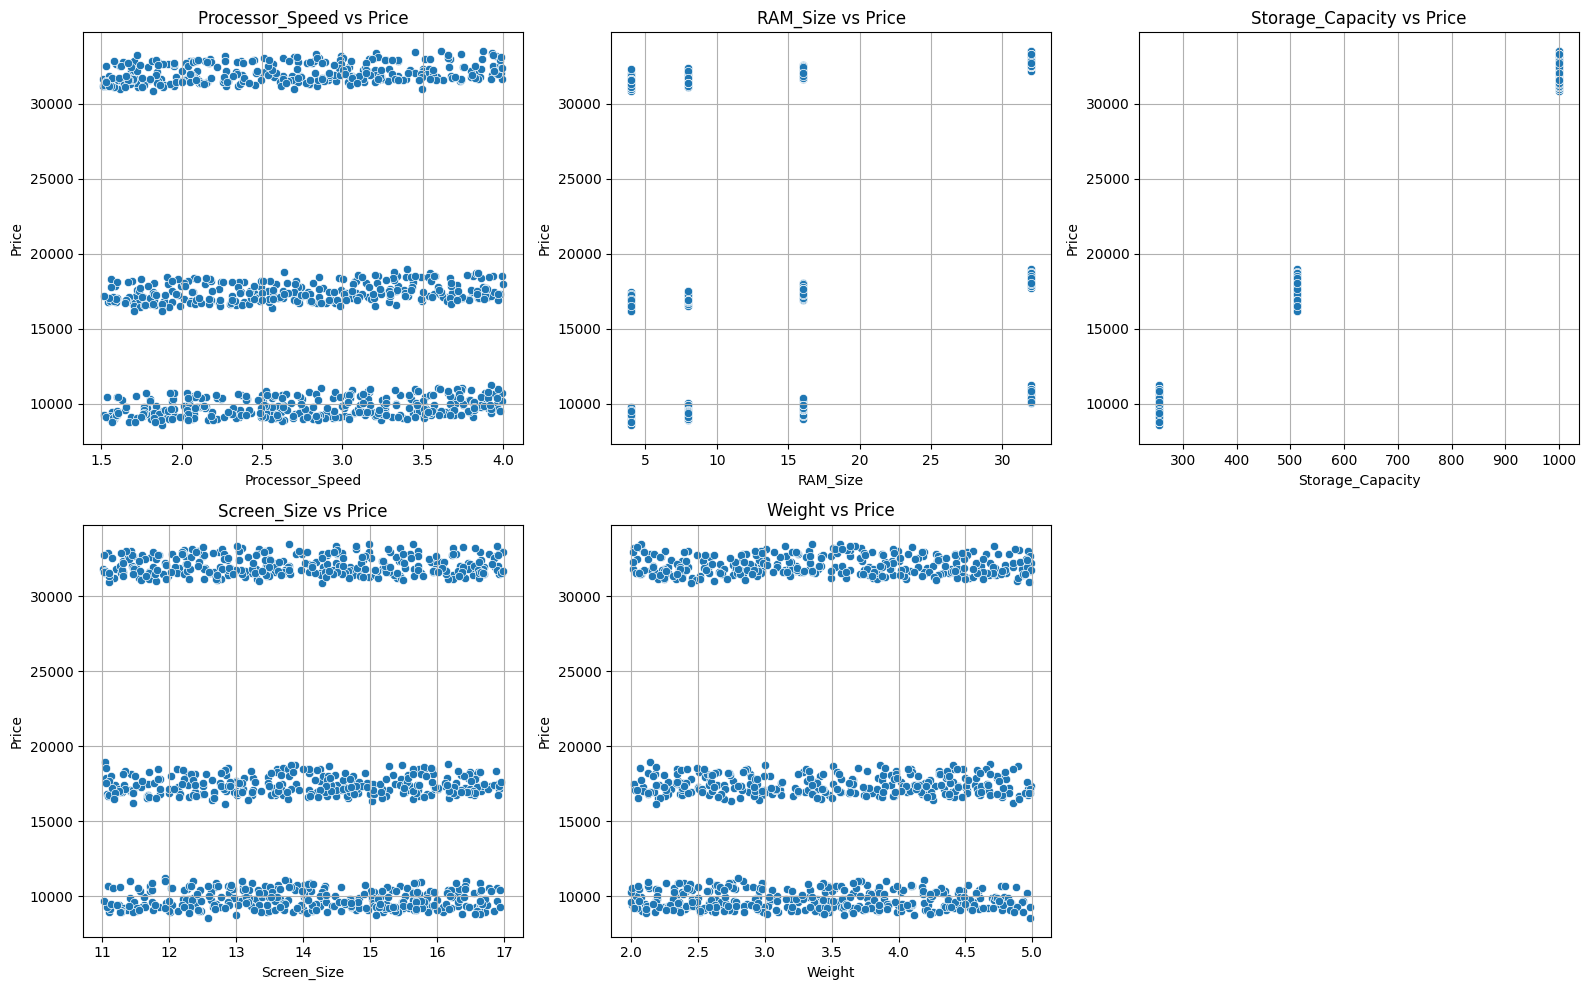

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'Price' bade baki numeric columns gulo ber kore neya
cols_to_plot = [col for col in numeric_df.columns if col != 'Price']

# Subplot set-up (2 row, 3 column)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
axes = axes.flatten() # 2D array-ke 1D array-te convert kora loop chalate subidhar jonno

for i, col in enumerate(cols_to_plot):
    sns.scatterplot(x=df[col], y=df['Price'], ax=axes[i])
    axes[i].set_title(f'{col} vs Price', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

# Jodi kono empty subplot thake (5 ta plot hole 6 nombor box khali thakbe), seta muche fela
for j in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Plot gulor moddhe gap thik rakhar jonno
plt.show()